# Text Analysis using TextBlob

In this lesson, we'll expore text analysis using [TextBlob](http://textblob.readthedocs.io/en/dev/). TextBlob is a Python library for processing textual data, which provides a simple API (*application programming interface*) for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

*Note: a "library" (or "module") is just programming-speak for an extension. It's something we can add to our Python installation in order to get special abilities.* 

The process to `import` a library into your Jupyter Notebook is very simple, but in order to do so, we must first install the library on the computer.

### Installing TextBlob
To install TextBlob on your computer, open the Anaconda3 folder in the Start menu (Start -> All Programs -> Anaconda3 (64-bit)), and select the Anaconda Prompt.

In the window that opens, type `pip install textblob` and hit enter. You should see the installation process and the message "Successfully installed textblob-0.15.1" when the installation is complete.

Now that we've...

In [17]:
from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer

#from collections import Counter

Now, let's test TextBlob to make sure it's working properly:

In [4]:
# What do you think the code below will do?

blob = TextBlob("It was the best of times, it was the worst of times...")
print(blob.translate(to="es"))

Fue el mejor de los tiempos, fue el peor de los tiempos ...


This small piece of code takes a string ("It was the..."), and uses the TextBlob library we imported to create a special TextBlob object we have named "blob". 

The last line of code takes this object and translates it, using the Google Translate API, which is included in TextBlob. 

At this point, you might be a little confused about what we mean by "TextBlob objects." Without going into too much detail, this is a feature of object-oriented-programming, where we are interacting with special data structures called *objects*. 

All you really need to know now is that when we talk about TextBlob objects, what we really mean are pieces of text that have been converted into a TextBlob, which means we can call the build-in TextBlob functions (or methods) on this object, as we do with the line: `blob.translate(to="es")` where we call the method `translate` on the TextBlob object named `blob`.





------

Before we dive in deeper, let's write a quick function that will make it easy to retrieve TextBlob objects based on a selected file. 

Remember how to read files? Each time we had to open a file, read the contents and then close the file. Since this is a series of steps we will often need to do, we can write a single function that does all that for us. We write a small utility function read_file(filename) that reads the specified file and simply returns all contents as a TextBlob object that we can work with.

In [20]:
def read_file(filename):
    "Read the contents of FILENAME and return as a TextBlob object."
    infile = open(filename)
    contents = infile.read()
    blob = TextBlob(contents) 
    infile.close()
    return blob

Now, instead of having to open a file, read the contents and close the file, we can just call the function read_file to do all that:

In [21]:
text = read_file("data/OliverTwist.txt")

#print(text.translate(to="es"))

> Now that we have an easy-to-use function for creating our TextBlobs, we can start learning some new functionality.

## Sentiment Analysis

From [Wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis): 

Sentiment analysis "refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information...

A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral." 

In [22]:
# What do you think this will return?
text.sentiment


Sentiment(polarity=0.08548031384868306, subjectivity=0.49169707194251144)

The sentiment method returns two values: polarity and subjectivity. The polarity score is a float within the range [-1.0, 1.0], where -1.0 is very negative and 1.0 is very positive.

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

Note that these values are returned in the form of a tuple, which is very similar to a list. 

We can also pull just the polarity or the subjectivity scores:

In [41]:
# try running the code below

print("The polarity is " + str(text.sentiment[0]))
print("The subjectivity is " + str(text.sentiment[1]))

The polarity is 0.08548031384868306
The subjectivity is 0.49169707194251144


In this example, we print the individual polarity and subjectivity values by referring to their respective indicies and changing them to strings with the `str()` function.

-----

### Quiz #1: In the cell below, determine the polarity and subjectivity of at least two Dickens novels. See if you can find the most positive and most negative. 

In [46]:
# enter your code below

text2 = read_file("data/BleakHouse.txt")
text2.sentiment

Sentiment(polarity=0.09977166208178351, subjectivity=0.49817774418331007)

---

## What if we want to look at individual sentences? 

[TextBlob also supports tokenization](http://textblob.readthedocs.io/en/dev/quickstart.html#tokenization), or breaking a text into words or sentences. 

For sentence tokenization, TextBlob gives us a method called `sentences` that can be used to break a larger corpus into individual sentences. This can be used on its own, but we can also combine it with the sentiment analysis skills we've been building. 

In [38]:
# try running the code below

for sentence in text.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.09375, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1290909090909091, subjectivity=0.34363636363636363)
Sentiment(polarity=0.175, subjectivity=0.21666666666666667)
Sentiment(polarity=0.24218855218855218, subjectivity=0.4790235690235691)
Sentiment(polarity=0.21333333333333335, subjectivity=0.4916666666666667)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.24789772727272727, subjectivity=0.6250757575757575)
Sentiment(polarity=0.1785353535353535, subjectivity=0.5133030303030303)
Sentiment(polarity=-0.5, subjectivity=0.3)
Sentiment(polarity=-0.4, subjectivity=0.7)
Sentiment(polarity=0.14566326530612245, subjectivity=0.4211734693877552)
Sentiment(polarity=0.15833333333333333, subjectivity=0.44166666666666665)
Sentiment(polarity=0.2505952380952381, subjectivity=0.5172619047619048)
Sentiment(polarity=0.057638888888888885, subjectivity=0.46388888888888885)
Sentiment(polarity=0.1

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.29166666666666663, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4583333333333333, subjectivity=0.5041666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.30625, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentim

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=0.14285714285714285, subjectivity=0.5178571428571428)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.125)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.057142857142857134, subjectivity=0.4857142857142857)
Sentiment(polarity=-0.00625, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivi

Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=0.31309523809523804, subjectivity=0.5678571428571428)
Sentiment(polarity=-0.03571428571428571, subjectivity=0.35714285714285715)
Sentiment(polarity=-0.03272727272727274, subjectivity=0.43090909090909085)
Sentiment(polarity=0.36818181818181817, subjectivity=0.725)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2333333333333333, subjectivity=0.3333333333333333)
Sentiment(polarity=0.6125, subjectivity=0.42500000000000004)
Sentiment(polarity=0.16666666666666666, subjectivity=0.6900000000000001)
Sentiment(polarity=0.22499999999999998, subjectivity=0.5)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.6333333333333333)
Sentiment(polarity=0.29047619047619044, subjectivity=0.4880952380952381)
Sentiment(polarity=-0.03333333333333333, subjectivity=0.45)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarit

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.060185185185185196, subjectivity=0.5546296296296297)
Sentiment(polarity=-0.21428571428571427, subjectivity=0.35714285714285715)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6666666666666666, subjectivity=0.75)
Sentiment(polarity=0.25, subjectivity=0.2833333333333333)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.2, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.10185185185185186, subjectivity=0.4962962962962963)
Sentiment(polarity=0.0, subjectivity=0.05)
Sentiment(polarity=0.0, subjectivity=0.0)

Okay...that's a lot of information. What we've done here is use TextBlob's built-in `sentences` method to break the text up into individual sentences. These sentences are then iterated over through our `for` loop, printing the `sentiment` for each.

But what can we do with this information? Now that we have computed a range of general statistics for our text, it would be nice to have a better way to visualize them. 

Python's plotting library *matplotlib* (see [here](http://matplotlib.org)) allows us to produce all kinds of graphs. We could for example, plot for each sentence, what its polarity is.

To do this, let's first create a list and add the polarity values of each sentence in the text to this list:

In [42]:
# showing change in sentiment over the duration of the novel)??

sentiment_polarity_by_sentence = []

for sentence in text.sentences:
    sentiment_polarity_by_sentence.append(sentence.sentiment[0])
print(sentiment_polarity_by_sentence)

[0.0, -0.09375, 0.0, 0.1290909090909091, 0.175, 0.24218855218855218, 0.21333333333333335, 0.1, 0.24789772727272727, 0.1785353535353535, -0.5, -0.4, 0.14566326530612245, 0.15833333333333333, 0.2505952380952381, 0.057638888888888885, 0.10416666666666669, 0.05, 0.09079545454545454, -0.09555555555555556, 0.3, 0.27499999999999997, 0.0, 0.024999999999999994, 0.24374999999999997, 0.1, -0.19166666666666665, -0.05, 0.0, -0.21250000000000002, 0.0, 0.0, -0.05, 0.0, 0.0, 0.0, -0.5, -0.2, -0.5, 0.8, 0.0, -0.1875, 0.0, 0.05, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.02888888888888888, 0.5625, -0.09722222222222222, -0.025, 0.0, 0.0, -0.025000000000000005, 0.0, 0.0, 0.0, 0.0, -0.049999999999999996, 0.18333333333333335, 0.48000000000000004, 0.4916666666666667, 0.55, 0.36453423120089784, -0.21027777777777779, 0.21428571428571427, 0.1, 0.0, 0.49583333333333335, 0.16666666666666669, -0.2866666666666667, 0.7, 0.2, 0.07916666666666666, 0.0, 0.0, 0.8, 0.1, 0.125, 0.625, 0.07291666666666666, 0.0, 0.0, 0.0, 0.0, 0.25, 0

Now, let's import our new library, `matplotlib`, and use it to plot the values in our list:

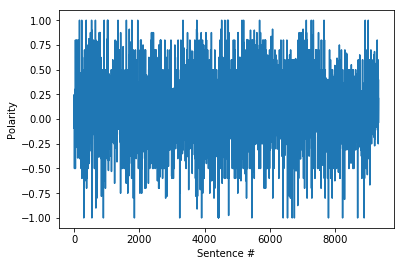

In [48]:
import matplotlib.pyplot as plt

plt.plot(sentiment_polarity_by_sentence)
plt.ylabel('Polarity')
plt.xlabel('Sentence #')
plt.show()


That's interesting, but it's still pretty difficult to determine whether there's a trend there. Why don't we try another example with a different type of plot. 

In [66]:
sentence_index = []
num = 0
for i in sentiment_polarity_by_sentence:
    sentence_index.append(index)
    index +=1
#print(new_list)
    
plt.plot(, set)
plt.ylabel('Polarity')
plt.xlabel('Sentence #')
plt.show()


PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

Invalid entry found in 'data' at index, '0'

Path To Error: ['data'][0]

Valid items for 'data' at path ['data'] under parents ['figure']:
    ['Area', 'Bar', 'Box', 'Candlestick', 'Carpet', 'Choropleth',
    'Contour', 'Contourcarpet', 'Heatmap', 'Heatmapgl', 'Histogram',
    'Histogram2d', 'Histogram2dcontour', 'Mesh3d', 'Ohlc', 'Parcoords',
    'Pie', 'Pointcloud', 'Sankey', 'Scatter', 'Scatter3d', 'Scattercarpet',
    'Scattergeo', 'Scattergl', 'Scattermapbox', 'Scatterternary',
    'Surface', 'Table']

Entry should subclass dict.

In [ ]:
### Quiz #2: in the cell below, try 

## Word & Noun Phrase Frequencies

In [37]:
# find single word count, case insensitive 
text.word_counts['oliver']

876

>**Wait, didn't we recieve a different word count in our previous exercise?**
Why do you think this could be?

In [9]:
# http://textblob.readthedocs.io/en/dev/quickstart.html#get-word-and-noun-phrase-frequencies

counts = OTblob.word_counts
type(counts)
print(counts)

defaultdict(<class 'int'>, {'oliver': 849, 'twist': 58, 'by': 772, 'charles': 7, 'dickens': 1, 'chapter': 61, 'i': 1865, 'treats': 4, 'of': 3837, 'the': 9594, 'place': 116, 'where': 201, 'was': 1804, 'born': 21, 'and': 5361, 'circumstances': 22, 'attending': 2, 'his': 2344, 'birth': 17, 'among': 57, 'other': 237, 'public': 22, 'buildings': 4, 'in': 2369, 'a': 3730, 'certain': 27, 'town': 40, 'which': 876, 'for': 1154, 'many': 137, 'reasons': 10, 'it': 1879, 'will': 301, 'be': 773, 'prudent': 5, 'to': 3866, 'refrain': 1, 'from': 630, 'mentioning': 2, 'assign': 2, 'no': 587, 'fictitious': 1, 'name': 80, 'there': 569, 'is': 749, 'one': 457, 'anciently': 1, 'common': 27, 'most': 119, 'towns': 1, 'great': 234, 'or': 499, 'small': 80, 'wit': 1, 'workhouse': 39, 'this': 800, 'on': 937, 'day': 126, 'date': 3, 'need': 37, 'not': 812, 'trouble': 24, 'myself': 30, 'repeat': 9, 'inasmuch': 6, 'as': 1323, 'can': 188, 'possible': 28, 'consequence': 14, 'reader': 12, 'stage': 6, 'business': 48, 'at':

In [13]:
# Find top word frequencies
c = Counter(counts)
c.most_common(40)

[('the', 9594),
 ('and', 5361),
 ('to', 3866),
 ('of', 3837),
 ('a', 3730),
 ('he', 2497),
 ('in', 2369),
 ('his', 2344),
 ('that', 1956),
 ('it', 1879),
 ('i', 1865),
 ('was', 1804),
 ('you', 1757),
 ('with', 1564),
 ('as', 1323),
 ('had', 1239),
 ('said', 1232),
 ('s', 1189),
 ('for', 1154),
 ('mr', 1072)]

In [23]:
#OTblob.noun_phrases.count()
noun_phrase = OTblob.np_counts
print(noun_phrase)

defaultdict(<class 'int'>, {'oliver': 818, 'charles dickens': 1, 'treats': 1, 'was born': 1, 'circumstances attending': 1, 'birth': 1, 'public buildings': 1, 'certain town': 1, 'fictitious name': 1, 'possible consequence': 1, 'long time': 14, 'parish surgeon': 2, 'considerable doubt': 1, 'inestimable merit': 1, 'faithful specimen': 1, 'enviable circumstance': 1, 'particular instance': 2, 'considerable difficulty': 2, 'troublesome practice': 1, 'easy existence': 1, 'flock mattress': 2, 'brief period': 1, 'careful grandmothers': 1, 'anxious aunts': 1, 'profound wisdom': 1, 'old woman': 13, 'such matters': 2, 'nature': 5, 'new burden': 1, 'male infant': 1, 'useful appendage': 1, 'proper action': 1, 'patchwork coverlet': 1, 'young woman': 19, 'faint voice': 3, "bed 's head": 2, "'lor bless": 2, 'dear heart': 3, 'green glass bottle': 1, 'evident satisfaction': 3, 'think': 3, 'young lamb': 1, 'consolatory perspective': 1, "mother 's prospects": 1, 'due effect': 1, 'patient shook': 1, 'cold w

In [24]:
np = Counter(noun_phrase)
print(np.most_common(20))


[('oliver', 818), ('mr bumble', 344), ('jew', 319), ('fagin', 271), ('sikes', 258), ('mr brownlow', 168), ('rose', 145), ('monks', 127), ('noah', 113), ('dodger', 109), ('nancy', 102), ('old gentleman', 99), ('mr giles', 82), ('mr sikes', 78), ('bill', 77), ('old lady', 64), ("'it 's", 63), ('corney', 63), ('mr grimwig', 60), ('mann', 58)]


## Other fun stuff

In [26]:
#OTblob.translate(to='es')

### Visualizing general statistics

Now that we have computed a range of general statistics for our corpus, it would be nice to visualize them. Python's plotting library *matplotlib* (see [here](http://matplotlib.org)) allows us to produce all kinds of graphs. We could for example, plot for each story, how many sentences it contains: